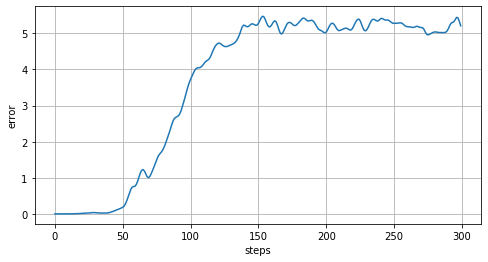

elapsed_time:3.5399229526519775[sec]


In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
from numba import jit
import time
#全部にちょっとだけ誤差を加えて，それがどれくらい増えるかの確認

start = time.time()

N = 300
M = 250
F = 8.0
K = 40
k = np.empty(K)
k1 = np.empty(K)
k2 = np.empty(K)
k3 = np.empty(K)
k4 = np.empty(K)
Xtmp1 = np.empty(K)
Xtmp2 = np.empty(K)
Xtmp3 = np.empty(K)

kalt = np.empty(K)
k1alt = np.empty(K)
k2alt = np.empty(K)
k3alt = np.empty(K)
k4alt = np.empty(K)
Xtmp1alt = np.empty(K)
Xtmp2alt = np.empty(K)
Xtmp3alt = np.empty(K)
Xalt = np.empty(K)
X = np.empty(K)

e = np.empty((N, K))

@jit
def df(X):
    nextX = np.empty(K)
    for j in range(K):
        if j == 0:
            nextX[j] = (X[j+1] - X[38])*X[39] - X[j] + F
        elif j == 1:
            nextX[j] = (X[j+1] - X[39])*X[j-1] - X[j] + F
        elif j == 39:
            nextX[j] = (X[0] - X[j-2])*X[j-1] - X[j] + F
        else:
            nextX[j] = (X[j+1] - X[j-2])*X[j-1] - X[j] + F
    return nextX


X0 = np.full(40, F)
X0[19] = F*1.001


#3年間（1日4ステップで3年間で4380ステップ）
#dt = 0.05のためtend = 4380*0.05=219となる
#3年間分最初に回して，過渡効果を無視できるようにする．


tstart = 0.0
tend = 4*365*3*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)


for t in tpoints:
    k1 = dt*df(X0)
    Xtmp1 = X0 + k1*0.5
    k2 = dt*df(Xtmp1)
    Xtmp2 = X0 + k2*0.5
    k3 = dt*df(Xtmp2)
    Xtmp3 = X0 + k3
    k4 = dt*df(Xtmp3)
    k = (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
    X0 = X0 + k

#3年間回した後200ステップ分とる
#250回まわして平均を取る．
tstart = 0.0
tend = 0.05*N
dt = 0.05
rmse = np.zeros(N)
sum = np.zeros(N)
tpoints = np.arange(tstart, tend, dt)
ppoints = np.arange(0, M, 1)

#250ステップ回す
for p in ppoints:
    n = 0
    Xalt = X0.copy()
    X = X0.copy()
    Xalt = Xalt + rand.normal(0, 0.001, K)
    
    #２００ステップ回す
    for t in tpoints:
        
        e[n] = np.square(Xalt - X)
        
        k1 = dt*df(X)
        k1alt = dt*df(Xalt)
        Xtmp1 = X + k1*0.5
        Xtmp1alt = Xalt + k1alt*0.5
        
        k2 = dt*df(Xtmp1)
        k2alt = dt*df(Xtmp1alt)
        Xtmp2 = X + k2*0.5
        Xtmp2alt = Xalt + k2alt*0.5
        
        k3 = dt*df(Xtmp2)
        k3alt = dt*df(Xtmp2alt)
        Xtmp3 = X + k3
        Xtmp3alt = Xalt + k3alt
        
        k4 = dt*df(Xtmp3)
        k4alt = dt*df(Xtmp3alt)

        
        k = (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
        kalt = (k1alt + 2.0*k2alt + 2.0*k3alt + k4alt)/6.0
        
        X = X + k
        Xalt = Xalt + kalt
        sum_e = np.sum(e[n])/K
        rmse[n] = rmse[n] + np.sqrt(sum_e)
        n = n +1
        
        

rmse = rmse/M

x = np.arange(0, N, 1)
plt.figure(figsize=(8, 4))
plt.xlabel("steps")
plt.ylabel("error")
plt.grid(True)
plt.plot(x, rmse)
plt.show()
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")